In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Exercise 1

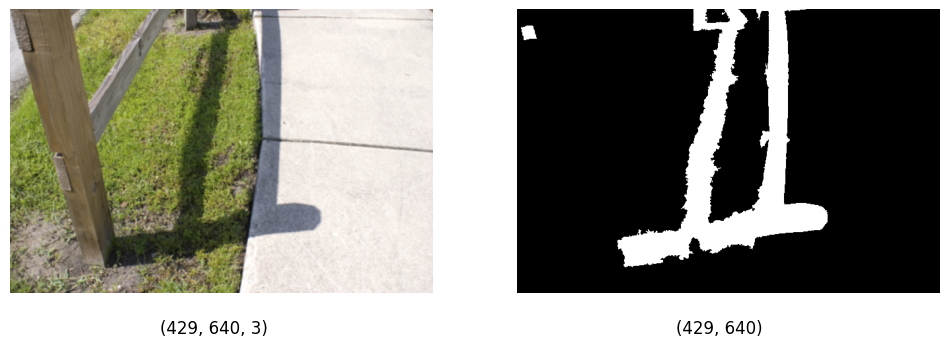

In [2]:
image_I = cv2.imread('./images.jpg')
image_J = cv2.imread('./binary.png', cv2.IMREAD_GRAYSCALE)
image_I = cv2.cvtColor(image_I, cv2.COLOR_BGR2RGB)
# image_J = cv2.cvtColor(image_J, cv2.COLOR_BGR2RGB)

resized_image_I = cv2.resize(image_I, (image_J.shape[1], image_J.shape[0]))
double_image_I = resized_image_I.astype(np.float64) / 255

fig, axes =  plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(double_image_I)
axes[0].axis('off')
axes[1].imshow(image_J, cmap='gray')
axes[1].axis('off')

# Đặt tiêu đề ở phía dưới của ảnh
plt.figtext(0.25, 0.04, f'{double_image_I.shape}', fontsize=12)
plt.figtext(0.68, 0.04, f'{image_J.shape}', fontsize=12)

plt.show()

# Exercicse 2

### 2.1

(-0.5, 639.5, 428.5, -0.5)

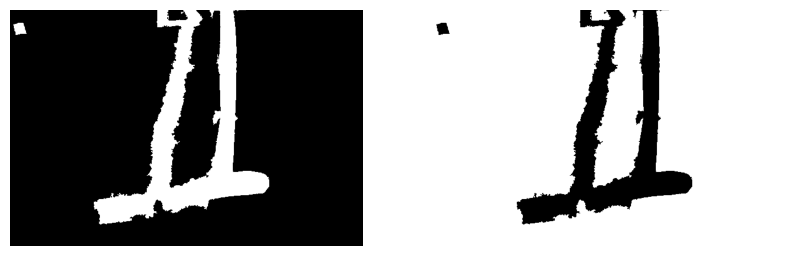

In [3]:
image_J_Binary = np.where(image_J > 0, 0, 1)

plt.figure(figsize=(10, 8))
plt.subplot(121)
plt.imshow(image_J, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(image_J_Binary, cmap='gray')
plt.axis('off')


### 2.2

In [4]:
# alpha_image = []
# with open('./alpha.txt') as file:
#     # data_image = file.readlines()
#     for f in file:
#         alpha_image.append(f.split('\t'))
# alpha_image = np.array(alpha_image, dtype=int)

alpha_image = np.loadtxt('./alpha.txt')

(-0.5, 639.5, 428.5, -0.5)

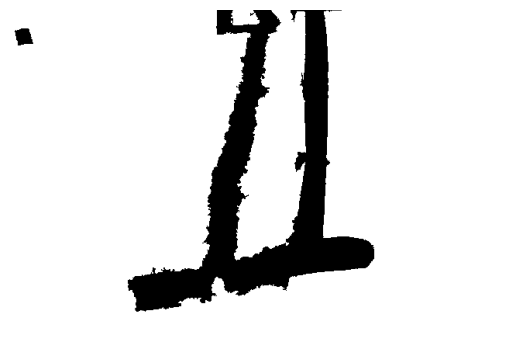

In [5]:
plt.imshow(alpha_image, cmap='gray')
plt.axis('off')

# Exercicse 3

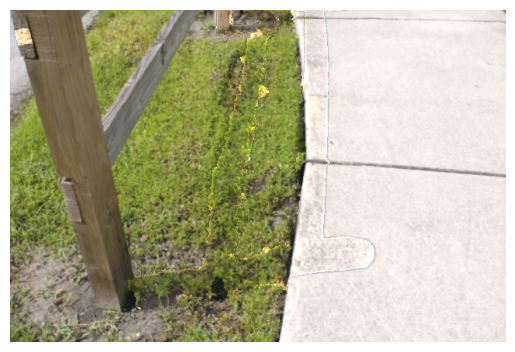

In [6]:
r = np.array([1.2, 1.0, 0.7])
m = alpha_image.shape[0]
n = alpha_image.shape[1]

I = np.ones((m, n))

c = np.array([double_image_I[: , :, 0], double_image_I[:, :, 1], double_image_I[:, :, 2]])
rc = []

for i in range(3):
    rc.append((I * (r[i] + 1)) / (alpha_image * r[i] + 1) * c[i])

SF_image = np.dstack((rc[0], rc[1], rc[2]))
SF_image_new = np.where(SF_image > 1, 1, SF_image)

plt.imshow(SF_image_new)
plt.axis('off')
plt.show()